In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from langdetect import detect
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix

In [102]:
#Leer el archivo parquet que sale del preprocess.py
path = '/export/usuarios_ml4ds/lbartolome/NextProcurement/data/processed_10_abr/trf_lote_es.parquet'
df_preprocesado = pd.read_parquet(path)

# Función para detectar idiomas

In [ ]:
# Función para detectar el lenguaje con langdetect
def detect_lang(x: str) -> str:
    try:
        lang = detect(x)
        print(lang)
    except:
        lang = 'Other'
    return lang

# Cargando modelo tópicos

In [105]:
# Cargar descripciones de tópicos, es la salida del modelo LDA
#tpc_descriptions_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_descriptions.txt"
#tpc_descriptions = pd.read_csv(tpc_descriptions_path, header=None, names=['description'])

# Cargar etiquetas de tópicos
#tpc_labels_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_labels.txt"
#tpc_labels = pd.read_csv(tpc_labels_path, header=None, names=['label'])

# Cargar embeddings de tópicos, ahora mismo no son necesarias
#tpc_embeddings_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/TMmodel/tpc_embeddings.npy"
#tpc_embeddings = np.load(tpc_embeddings_path, allow_pickle=True)

# Cargando el corpus

In [108]:
# Cargar el corpus
#corpus_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/train_data/corpus.txt"
#corpus_df = pd.read_csv(corpus_path, header=None, names=['description'], index_col=False)

In [109]:
#corpus_df

In [110]:
def quitar_prefijo(texto):
    
    patron = r'^\d+\t\d+\t'
    texto_modificado = re.sub(patron, '', texto)
    
    return texto_modificado

In [111]:
#corpus_df['description'] = corpus_df['description'].apply(quitar_prefijo)

In [112]:
#pd.set_option('max_colwidth', None)

In [113]:
#corpus_df

In [114]:
'''
def generar_dataframe_desde_txt(vocab_path):
    # Inicializar listas para almacenar los componentes separados
    palabras = []
    freqs = []

    # Abrir el archivo para lectura
    with open(vocab_path, 'r', encoding='utf-8') as archivo:
        # Iterar sobre cada línea del archivo
        for linea in archivo:
            # Dividir la línea por el tabulador
            partes = linea.strip().split('\t')
            # Asegurar que la línea tiene exactamente dos partes
            if len(partes) == 2:
                palabra, freq = partes
                palabras.append(palabra)
                freqs.append(int(freq)) 

    # Crear un df con las listas de palabras y frecuencias
    df = pd.DataFrame({
        'palabra': palabras,
        'freq': freqs
    })

    return df
'''

"\ndef generar_dataframe_desde_txt(vocab_path):\n    # Inicializar listas para almacenar los componentes separados\n    palabras = []\n    freqs = []\n\n    # Abrir el archivo para lectura\n    with open(vocab_path, 'r', encoding='utf-8') as archivo:\n        # Iterar sobre cada línea del archivo\n        for linea in archivo:\n            # Dividir la línea por el tabulador\n            partes = linea.strip().split('\t')\n            # Asegurar que la línea tiene exactamente dos partes\n            if len(partes) == 2:\n                palabra, freq = partes\n                palabras.append(palabra)\n                freqs.append(int(freq)) \n\n    # Crear un df con las listas de palabras y frecuencias\n    df = pd.DataFrame({\n        'palabra': palabras,\n        'freq': freqs\n    })\n\n    return df\n"

In [115]:
#vocab_path = "/export/usuarios_ml4ds/lbartolome/NextProcurement/NP-Search-Tool/sample_data/models/Mallet/Mallet_5_topics/model_data/vocab_freq.txt"
#df = generar_dataframe_desde_txt(vocab_path)
#df_ordenado = df.sort_values(by='freq', ascending=False).reset_index(drop=True)

In [116]:
#vocab = pd.read_csv(vocab_path, header=None,index_col=False)

In [117]:
#df_ordenado.to_csv('palabras_con_freq.csv',index = False)

# Sacando stopwords TF-IDF

In [39]:
#Leer el archivo parquet que sale del preprocess.py
path = "/export/usuarios_ml4ds/lbartolome/Repos/repos_con_carlos/RAG_tool/data/out/optimized/3.equivalence_detection/datos_modelo_es_Mallet_df_merged_14_topics_45_ENTREGABLE/aux_topic_model_tm_1/MalletLda_100/datos_modelo_es_Mallet_df_merged_14_topics_45_ENTREGABLE_embeddings_preproc.parquet"
df_preprocesado = pd.read_parquet(path)

In [40]:
df_preprocesado

,id_tm,raw_text,lemmas,embeddings,n_tokens
0,0,contrato menor de obras para la instalación de...,instalación rejilla foso pista_atletismo anexo...,-0.04406907 -0.08293131 0.005752485 0.07067377...,7
1,1,acabado en revestimiento de granito en torre d...,acabado revestimiento granito ventilación garaje,-0.034213696 0.009006779 -0.004287515 0.009578...,6
2,2,obras de remodelación de sala y almacen en pla...,remodelación almacir planta inferior centro sa...,-0.007823987 0.0022479712 -0.0050431485 0.0439...,15
3,3,realización de trabajos de refuerzo estructura...,refuerzo_estructural tabiquería pladur anclaje...,-0.045626644 -0.05282912 -0.032013252 0.027243...,8
4,4,obras de acondicionamiento de parcela en la ba...,incorporar_especial carácter_relativo inserció...,-0.052751653 0.033168957 0.0051500476 -0.02800...,8
...,...,...,...,...,...
34252,34252,renovación de los revestimientos de la piscina...,renovación revestimiento instalación deportivo,-0.0305871 -0.021477008 -0.00044009666 0.02860...,6
34253,34253,obras de construcción de una cubrición sobre p...,construcción cubrición_pista ikastetxea,-0.047371056 -0.05083523 -0.021601152 0.059879...,4
34254,34254,obra de reforma de la guardería infantil sita ...,reforma guardería infantil sito cambio,0.068006605 0.028291764 -0.012681559 -0.033845...,7
34255,34255,obras de la línea eléctrica de alta tensión pa...,eléctrico alto_tensión suministro energía esta...,-0.044184666 -0.02498519 0.0069313324 0.030341...,8


In [41]:
def get_filtered_words(text, threshold):
    # Inicializar el vectorizador TF-IDF sin un vocabulario específico
    vectorizer = TfidfVectorizer()    
    # Ajustar el vectorizador al texto para calcular valores IDF
    vectorizer.fit(text)
    # Obtener los nombres de las características (palabras) y sus valores IDF
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_

    # Filtrar palabras de baja importancia: comunes en el corpus (IDF menor o igual al umbral)
    low_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf < threshold]
    # Filtrar palabras de alta importancia: raras en el corpus (IDF mayor al umbral)
    high_importance_words = [word for word, idf in zip(feature_names, idf_values) if idf >= threshold]

    # Contar el número de palabras en cada subconjunto
    num_low_importance_words = len(low_importance_words)
    num_high_importance_words = len(high_importance_words)

    # Imprimir resultados
    print(f"Palabras comunes en el corpus (total: {num_low_importance_words}):\n", low_importance_words)
    print(f"Palabras raras en el corpus (total: {num_high_importance_words}):\n", high_importance_words)

    # Retornar los subconjuntos de palabras y sus conteos
    return low_importance_words, high_importance_words, num_low_importance_words, num_high_importance_words, feature_names

In [42]:
#Sirve para analizar el idf de las palabras
def get_idf_values(text):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    feature_names = vectorizer.get_feature_names_out()
    idf_values = vectorizer.idf_
    return feature_names, idf_values

#Sirve para sacar que palabras son las más repetidas
def get_tf_values(text):
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(text)
    total_word_counts = word_counts.sum(axis=0)
    # Obtener los nombres de las palabras
    feature_names = vectorizer.get_feature_names_out()
    
    # Convertir las frecuencias de término a un array de numpy
    tf_values = total_word_counts.A1
 
    # Ordenar las palabras por frecuencia de término
    sorted_tf_indices = np.argsort(tf_values)[::-1]
    sorted_words = feature_names[sorted_tf_indices]
    sorted_tf_values = tf_values[sorted_tf_indices]
    
    # Crear listas de las palabras y sus frecuencias ordenadas
    sorted_word_frequency = [(word, freq) for word, freq in zip(sorted_words, sorted_tf_values)]
    
    # Retornar la lista de palabras y frecuencias ordenadas
    return sorted_word_frequency

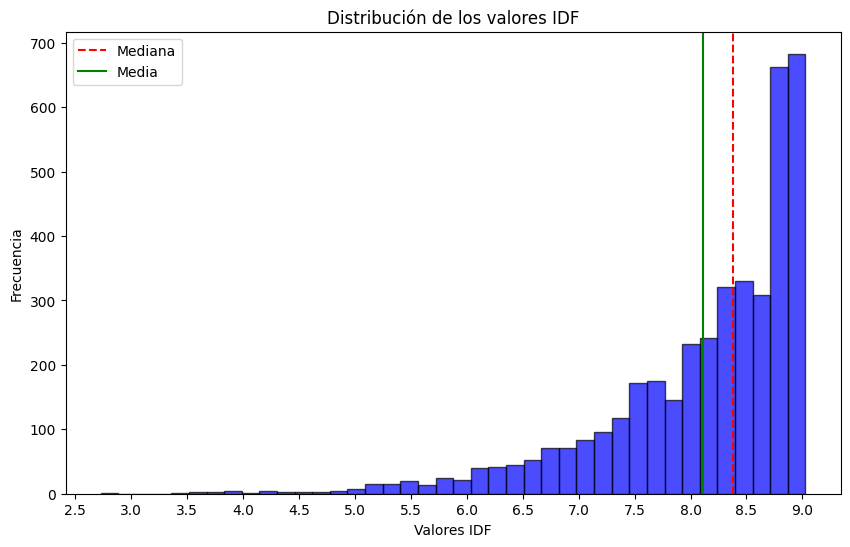

In [43]:
#Graficando los valores de idf para escoger el threshold
text = df_preprocesado['lemmas']
feature_names, idf_values = get_idf_values(text)

# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores IDF')
plt.xlabel('Valores IDF')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))  
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Mediana')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Media')
plt.legend()
plt.show()

In [44]:
sorted_word_frequency = get_tf_values(text)
for word, freq in sorted_word_frequency[:100]:  
    print(f"{word}: {freq}")

instalación: 6780
edificio: 3229
centro: 2986
reparación: 2828
servicio: 2457
municipal: 2391
zona: 2320
adecuación: 2021
actuación: 1960
construcción: 1915
suministro: 1790
reforma: 1597
tramo: 1584
sustitución: 1507
acondicionamiento: 1470
acceso: 1466
renovación: 1370
cubierto: 1336
carretera: 1223
fase: 1167
mantenimiento: 1005
municipio: 952
rehabilitación: 929
pavimentación: 840
término_municipal: 831
ampliación: 789
eléctrico: 749
centro_educación: 715
situado: 702
local: 701
infraestructura: 690
interior: 678
avenida: 666
urbanización: 660
pavimento: 644
provincia: 640
infantil_primaria: 625
planta: 614
denominado: 592
plan_recuperación: 574
alumbrado: 559
deportivo: 555
incluido: 544
exterior: 538
sito: 533
energético: 530
colocación: 525
protección: 514
accesibilidad: 513
saneamiento: 505
área: 499
adaptación: 498
presente: 495
aire_acondicionado: 493
elemento: 492
fondo_europeo: 476
protección_incendio: 472
abierto_simplificado: 467
cofinanciado_europeo: 464
consistente: 461

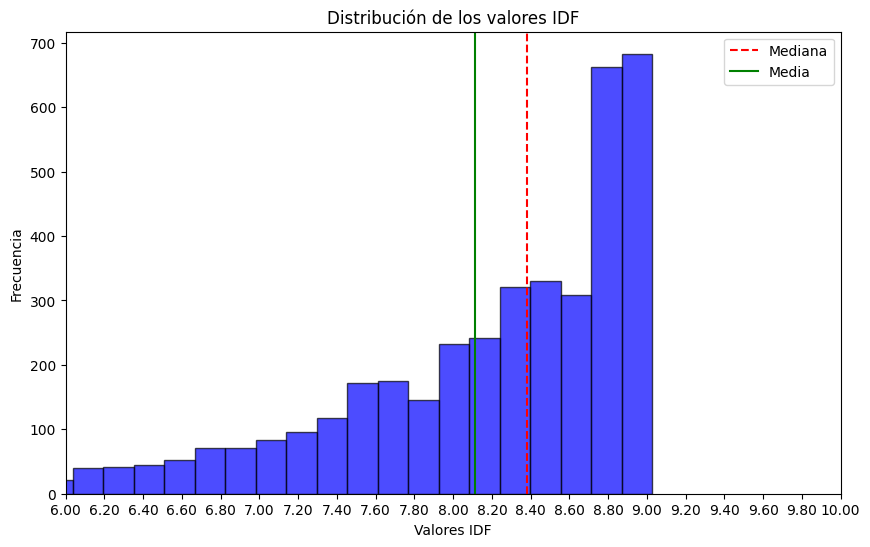

In [45]:
# Distribución de los valores IDF
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de los valores IDF')
plt.xlabel('Valores IDF')
plt.ylabel('Frecuencia')

# Ajustar las marcas y el formato del eje X para el zoom
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  # intervalos más finos en el eje X
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))  # dos decimales de precisión

# Ajusta los límites del eje X para hacer zoom en los valores mayores que 8.0
plt.xlim(6, 10)
# Líneas de la mediana y la media
plt.axvline(x=np.median(idf_values), color='red', linestyle='--', label='Mediana')
plt.axvline(x=np.mean(idf_values), color='green', linestyle='-', label='Media')
plt.legend()
plt.show()

In [57]:
text = df_preprocesado['lemmas']  
threshold = 6.5
low_importance, high_importance, num_low, num_high, palabras = get_filtered_words(text, threshold)

Palabras comunes en el corpus (total: 273):
 ['abastecimiento', 'abierto', 'abierto_simplificado', 'accesibilidad', 'acceso', 'acerado', 'acometido', 'acondicionamiento', 'actividad', 'actuación', 'actual', 'adaptación', 'adecuación', 'adjudicar_abierto', 'administrativo', 'afectado', 'agua_residual', 'ahorro_energético', 'aire_acondicionado', 'almacén', 'alquiler', 'alto', 'alto_velocidad', 'alumbrado', 'alumbrado_exterior', 'ampliación', 'anexo', 'antiguo', 'aparcamiento', 'apoyo', 'arquitectónico', 'ascensor', 'ascensor_fachada', 'aseo', 'asfaltado', 'aula', 'autoconsumo', 'autovía', 'avda', 'avenida', 'básico', 'cambio', 'cambio_modificar', 'camino_rural', 'canalización', 'carretera', 'cementerio', 'central', 'centro', 'centro_educación', 'cerramiento', 'cimentación', 'climatización', 'cofinanciado', 'cofinanciado_europeo', 'colector', 'colegio', 'colocación', 'complejo', 'comprendido', 'comunicación', 'conexión', 'conservación', 'consistente', 'consistir', 'consolidación', 'constr

In [49]:
lista_palabras = [str(elemento) for elemento in palabras.tolist()]

In [58]:
print(len(high_importance))
print(len(low_importance))

3763
273


In [52]:
# Ruta al archivo de stopwords manual, añadir 
stopwords_file_path = '/export/usuarios_ml4ds/lbartolome/Repos/repos_con_carlos/RAG_tool/data/out/optimized/stops_txt/tf_idf.txt'

# Escribir las palabras de baja importancia al archivo de stopwords, añadiendo nuevas líneas
try:
    with open(stopwords_file_path, 'w') as file:
        for word in low_importance:
            file.write(word + '\n')
    print("Palabras de baja importancia añadidas exitosamente al archivo.")
except IOError:
    print("Error: No se pudo abrir o escribir en el archivo.")

Palabras de baja importancia añadidas exitosamente al archivo.


In [152]:
# Ruta al archivo .txt
archivo_txt = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/tf_idf.txt'

# Leer el archivo .txt utilizando pandas
try:
    datos = pd.read_csv(archivo_txt, sep='\t', header=None)  
    print("Archivo leído correctamente:")
    print(datos)
except FileNotFoundError:
    print("Error: Archivo no encontrado.")
except pd.errors.ParserError:
    print("Error: No se pudo interpretar el archivo correctamente.")

Archivo leído correctamente:
                        0
0                 obimace
1                 agüimes
2       recreativas_excmo
3                olivares
4                 chaccac
..                    ...
377     contracte_técnico
378    posterior_direcció
379             obres_ram
380  projecte_constructiu
381                bienal

[382 rows x 1 columns]


In [162]:
lista_palabras = [str(elemento) for elemento in palabras.tolist()]

In [172]:
def filtrar_palabras(lista_palabras, df_lista_datos, dict=False):
    """
    Filtra las palabras en un DataFrame o diccionario según una lista de palabras permitidas.

    Parámetros:
    - lista_palabras: list, lista de palabras permitidas.
    - df_lista_datos: pd.DataFrame o dict, DataFrame o diccionario que contiene las palabras a filtrar.
    - dict: bool, si es True, se asume que df_lista_datos es un diccionario.

    Retorna:
    - list, lista de palabras filtradas que están presentes tanto en el DataFrame o diccionario como en lista_palabras.
    - Si dict es True, retorna un diccionario filtrado en lugar de una lista.
    """
    if dict:
        # Asumimos que df_lista_datos es un diccionario y filtramos por las claves
        claves_filtradas = {clave: valor for clave, valor in df_lista_datos.items() if clave in lista_palabras}
        return claves_filtradas
    else:
        # Asumimos que df_lista_datos es un DataFrame y trabajamos con la primera columna
        lista_datos = df_lista_datos.iloc[:, 0].tolist()
        palabras_filtradas = [palabra for palabra in lista_datos if palabra in lista_palabras]
        return palabras_filtradas

In [160]:
# Llamada a la función
resultado_filtrado = filtrar_palabras(lista_palabras, datos)
print("Palabras filtradas:", resultado_filtrado)

Palabras filtradas: ['obimace', 'agüimes', 'olivares', 'caiss', 'española_patentes', 'marcas', 'álava', 'impacto', 'finalidad', 'acompañamiento', 'real_decreto', 'bonete', 'peñascosa', 'masegoso', 'orden_pedido', 'fac', 'baños_encina', 'socovos', 'pozuelo', 'higueruela', 'albatana', 'alcalá_júcar', 'alatoz', 'bibliográfico', 'folleto', 'económica_financiera', 'exposición_temporal', 'roll_up', 'alhama', 'campillo', 'san_agustín', 'guadalix', 'servizos', 'organizado_jm', 'condado', 'bibliográfico_audiovisual', 'cenes_vega', 'san_antón', 'ossa', 'valdivia', 'educación_cultura', 'electricidad_periodo', 'vpo', 'subsecretaría_conselleria', 'acuartelamiento_guardia', 'obimace', 'inspección_periódico', 'subsanación_deficiencia', 'santa_brígida', 'camí', 'oca', 'acs', 'social_marina', 'grupo_presión', 'jesús', 'salón_acto', 'público_empleo', 'puente_genil', 'servicios_múltiples', 'subsecretaría_ministerio', 'avda', 'victoria_acentejo', 'redactado', 'española_patentes', 'honorario', 'valorado', 

In [161]:
len(resultado_filtrado)

250

In [165]:
# Ruta al archivo de stopwords manual, añadir 
file_path = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords/tf_idf.txt'

# Escribir las palabras de baja importancia al archivo de stopwords, añadiendo nuevas líneas
try:
    with open(file_path, 'w') as file:
        for word in resultado_filtrado:
            #file.write(word + '\n')
    print("Palabras añadidas correctamente al archivo.")
except IOError:
    print("Error: No se pudo abrir o escribir en el archivo.")

Palabras añadidas correctamente al archivo.


In [168]:
# Ruta al archivo de stopwords manual, añadir 
archivo_txt = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/eq.txt'
# Leer el archivo .txt utilizando pandas
try:
    datos = pd.read_csv(archivo_txt, sep='\t', header=None)  
    print("Archivo leído correctamente:")
    print(datos)
except FileNotFoundError:
    print("Error: Archivo no encontrado.")
except pd.errors.ParserError:
    print("Error: No se pudo interpretar el archivo correctamente.")


Archivo leído correctamente:
                                                   0
0                    aparato_aire:aire_acondicionado
1    nacional_supercomputación:supercomputing_center
2                  laentidad_pública:entidad_pública
3                           urbanístico:urbanización
4                              inversiones:inversión
..                                               ...
493                                       niña:niños
494                          autonomía_clm:autonomía
495                                  sanchez:sánchez
496                                   premio:premios
497                                        menu:menú

[498 rows x 1 columns]


In [171]:
# Convertir la columna del DataFrame en una lista
lineas = datos.iloc[:, 0].tolist()

# Crear el diccionario dividiendo cada línea por el delimitador ':'
diccionario = {}

for linea in lineas:
    if linea:  # Verificar que la línea no esté vacía
        clave, valor = linea.split(':')
        diccionario[clave.strip()] = valor.strip()  # Eliminar espacios en blanco opcionales

print(diccionario)

{'aparato_aire': 'aire_acondicionado', 'nacional_supercomputación': 'supercomputing_center', 'laentidad_pública': 'entidad_pública', 'urbanístico': 'urbanización', 'inversiones': 'inversión', 'pgou': 'plan_general_ordenación_urbana', 'cma': 'certifiación_cma', 'pci': 'certificación_pci', 'hermanas': 'hermana', 'parques': 'parque', 'modificado': 'modifiación', 'urb': 'urbanización', 'pymes': 'pyme', 'políticas_sociales': 'política_social', 'investigaciones_oncológicas': 'investigación_oncológica', 'institut_cartogràfic': 'instituto_cartográfico', 'cartogràfic_geològic': 'institut_cartogràfic', 'computarizada': 'tomografía_axial_computarizada', 'topogràfica_escala': 'escala_topográfica', 'revisió_cartografia': 'revisión_cartográfica', 'radiodiagnóstico_ecografía': 'ecografía', 'radiodiagnóstico_resonancia': 'resonancia', 'axial_computarizada': 'tomografía_axial_computarizada', 'rtvc_tf': 'rtvc', 'magnética_nuclear': 'resonancia_magnética', 'resonancia_magnético': 'resonancia_magnética', 

In [174]:
resultado_filtrado = filtrar_palabras(lista_palabras, datos, dict=True)
print("Palabras filtradas:", resultado_filtrado)

Palabras filtradas: {}


In [ ]:
'''
# Ruta donde se encuentran los archivos de stopwords
ruta_stopwords = '/export/usuarios_ml4ds/cggamella/NP-Search-Tool/sample_data/stopwords'

# Cargar todas las stopwords desde los archivos
stopwords = set()
for archivo in os.listdir(ruta_stopwords):
    if archivo.endswith('.txt'):
        ruta_completa = os.path.join(ruta_stopwords, archivo)
        with open(ruta_completa, 'r', encoding='utf-8') as f:
            stopwords.update(f.read().splitlines())

# Vectorizar el proceso de eliminación de stopwords
def eliminar_stopwords(fila):
    return ' '.join([palabra for palabra in fila.split() if palabra not in stopwords])

# Aplicar la función de manera vectorizada
df_preprocesado['lemmas'] = df_preprocesado['lemmas'].apply(eliminar_stopwords)
'''

Antes de aplicar las stopwords

In [ ]:
df_preprocesado['lemmas'].iloc[200030]

Después de aplicar las stopwords

In [ ]:
df_preprocesado['lemmas'].iloc[200030]

In [ ]:
df_preprocesado